# Google Colab Lab Assignment -NLP

**Course Name:** Deep Learning

**Lab Title:** NLP Techniques for Text Classification

**Student Name:**Alvin Abraham

**Student ID:**202201070132

**Date of Submission:** [Enter Date]

**Group Members**: Alvin Abraham


**Objective**
The objective of this assignment is to implement NLP preprocessing techniques and build a text classification model using machine learning techniques.




**Learning Outcomes:**

1. Understand and apply NLP preprocessing techniques such as tokenization, stopword removal, stemming, and lemmatization.

2. Implement text vectorization techniques such as TF-IDF and CountVectorizer.

3. Develop a text classification model using a machine learning algorithm.

4. Evaluate the performance of the model using suitable metrics.

# **Assignment Instructions:**

**Part 1: NLP Preprocessing**

**Dataset Selection:**

Choose any text dataset from **Best Datasets for Text** https://en.innovatiana.com/post/best-datasets-for-text-classification Classification, such as SMS Spam Collection, IMDb Reviews, or any other relevant dataset.

Dataset link:- https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Download the dataset and upload it to Google Colab.

Load the dataset into a Pandas DataFrame and explore its structure (e.g., check missing values, data types, and label distribution).

Text Preprocessing:

Convert text to lowercase.

Perform tokenization using NLTK or spaCy.

Remove stopwords using NLTK or spaCy.

Apply stemming using PorterStemmer or SnowballStemmer.

Apply lemmatization using WordNetLemmatizer.

Vectorization Techniques:

Convert text data into numerical format using TF-IDF and CountVectorizer.



In [1]:
!pip install -q nltk spacy
!python -m nltk.downloader punkt stopwords wordnet
!python -m spacy download en_core_web_sm

import pandas as pd
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import spacy

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 88.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/imdb-dataset-of-50k-movie-reviews


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Install and import necessary libraries
import pandas as pd
import numpy as np

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/IMDB Dataset.csv')  # Make sure your uploaded file is correctly named, adjust if needed

# Display basic info
print("First 5 rows:")
print(df.head())

print("\n Dataset Info:")
print(df.info())

print("\n Missing Values:")
print(df.isnull().sum())

print("\nLabel Distribution:")
if 'label' in df.columns:
    print(df['label'].value_counts())
    sns.countplot(x='label', data=df)
    plt.title("Label Distribution")
    plt.show()
else:
    print("No 'label' column found.")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


First 5 rows:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None

 Missing Values:
review       0
sentiment    0
dtype: int64

Label Distribution:
No 'label' column found.


In [6]:
!python -m nltk.downloader punkt_tab

<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [7]:
# ----------------------------
# Text Preprocessing
# ----------------------------

# Use appropriate column name for text
text_col = 'text' if 'text' in df.columns else df.columns[0]  # assuming the first column is text if not named

# Convert to lowercase
df['clean_text'] = df[text_col].str.lower()

# Tokenization
df['tokens'] = df['clean_text'].apply(word_tokenize)

# Remove stopwords
stop_words = set(stopwords.words('english'))
df['tokens_nostop'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words and word.isalpha()])

# Apply stemming
stemmer = PorterStemmer()
df['stemmed'] = df['tokens_nostop'].apply(lambda x: [stemmer.stem(word) for word in x])

# Apply lemmatization
lemmatizer = WordNetLemmatizer()
df['lemmatized'] = df['tokens_nostop'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Join tokens back to text
df['final_text'] = df['lemmatized'].apply(lambda x: ' '.join(x))

print("\nPreprocessing complete. Sample:")
print(df[['review', 'final_text']].head())



✅ Preprocessing complete. Sample:
                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                          final_text  
0  one reviewer mentioned watching oz episode hoo...  
1  wonderful little production br br filming tech...  
2  thought wonderful way spend time hot summer we...  
3  basically family little boy jake think zombie ...  
4  petter mattei love time money visually stunnin...  


In [8]:

# ----------------------------
# Vectorization
# ----------------------------

# TF-IDF Vectorization
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df['final_text'])

# Count Vectorization
count = CountVectorizer()
X_count = count.fit_transform(df['final_text'])

print("\n TF-IDF Shape:", X_tfidf.shape)
print(" Count Vectorizer Shape:", X_count.shape)

# Optionally, show top words
def show_top_words(vectorizer, X, top_n=10):
    sum_words = X.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    sorted_words = sorted(words_freq, key=lambda x: x[1], reverse=True)[:top_n]
    for word, freq in sorted_words:
        print(f"{word}: {freq:.2f}")

print("\n Top Words in TF-IDF:")
show_top_words(tfidf, X_tfidf)

print("\n Top Words in CountVectorizer:")
show_top_words(count, X_count)



 TF-IDF Shape: (50000, 87542)
 Count Vectorizer Shape: (50000, 87542)

 Top Words in TF-IDF:
br: 4470.29
movie: 2629.75
film: 2168.47
one: 1311.46
like: 1121.76
good: 982.67
time: 922.80
character: 886.19
would: 868.39
story: 856.23

 Top Words in CountVectorizer:
br: 201951.00
movie: 99849.00
film: 90372.00
one: 53623.00
like: 40139.00
time: 29633.00
good: 28877.00
character: 27767.00
would: 26475.00
even: 24781.00


**Splitting the Data:**

Divide the dataset into training and testing sets (e.g., 80% training, 20% testing).

**Building the Classification Model:**

Train a text classification model using Logistic Regression, Naïve Bayes, or any other suitable algorithm.

Implement the model using scikit-learn.

**Model Evaluation:**

Evaluate the model using accuracy, precision, recall, and F1-score.

Use a confusion matrix to visualize the results.

In [9]:
# Imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

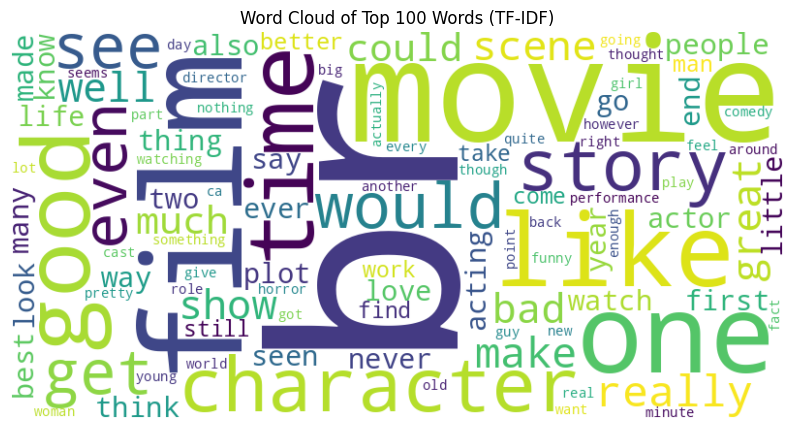

In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Step 1: Vectorize the full dataset to get all feature names
tfidf_vectorizer = TfidfVectorizer(max_features=100)  # Limit to top 100 features for clarity
X_full_tfidf = tfidf_vectorizer.fit_transform(df['final_text'])

# Step 2: Get feature names and their average TF-IDF score
feature_names = tfidf_vectorizer.get_feature_names_out()
word_tfidf_scores = X_full_tfidf.mean(axis=0).A1  # Convert sparse matrix to 1D array

# Step 3: Create a dictionary of word: score
word_freq = dict(zip(feature_names, word_tfidf_scores))

# Step 4: Generate and plot word cloud
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Top 100 Words (TF-IDF)")
plt.show()


In [11]:
# Assuming your target column is 'sentiment' based on the DataFrame info you provided
if 'sentiment' in df.columns:
    y = df['sentiment']
else:
    # Handle the case if 'sentiment' is also not found
    # You might need to inspect your DataFrame and adjust accordingly
    raise ValueError("No target column (e.g., 'sentiment', 'label') found for classification.")

X = df['final_text']  # Preprocessed text

# Use TF-IDF for feature extraction
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_vectorized, y, test_size=0.2, random_state=42, stratify=y)

print("Data split done.")
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Data split done.
Training set size: (40000, 87542)
Testing set size: (10000, 87542)


In [12]:
#----------------------------
# Step 2: Model Training
# ----------------------------

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)


📊 Evaluation for Logistic Regression:
Accuracy: 0.8919
Precision: 0.8921002691334626
Recall: 0.8919
F1 Score: 0.8918861949482328

Classification Report:
               precision    recall  f1-score   support

    negative       0.90      0.88      0.89      5000
    positive       0.88      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



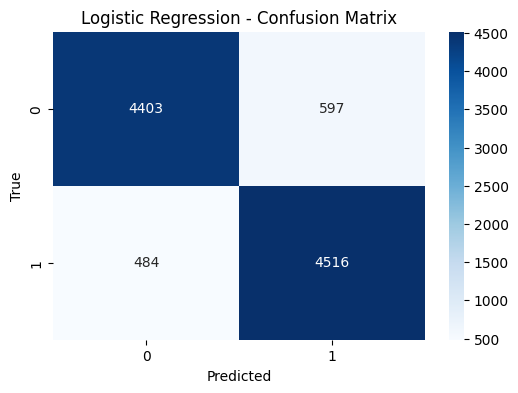


📊 Evaluation for Naive Bayes:
Accuracy: 0.8665
Precision: 0.866744119555741
Recall: 0.8665
F1 Score: 0.8664777805674643

Classification Report:
               precision    recall  f1-score   support

    negative       0.86      0.88      0.87      5000
    positive       0.88      0.85      0.86      5000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



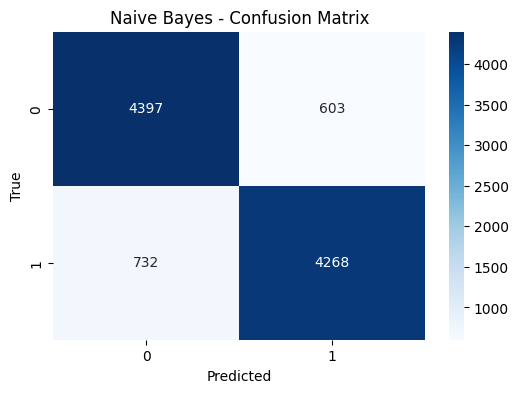

In [13]:
# ----------------------------
# Step 3: Evaluation Function
# ----------------------------

def evaluate_model(name, y_true, y_pred):
    print(f"\n📊 Evaluation for {name}:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted', zero_division=0))
    print("Recall:", recall_score(y_true, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_true, y_pred, average='weighted'))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

evaluate_model("Logistic Regression", y_test, lr_preds)
evaluate_model("Naive Bayes", y_test, nb_preds)

**Submission Guidelines:**

**Google Colab Notebook Submission:**

Save your notebook as NLP_Text_Classification_YourName.ipynb.

Ensure all code cells are executed, and the output is visible.

Include proper documentation and comments explaining each step.

**Report Submission (Optional):**

Prepare a short report (2-3 pages) summarizing your approach, findings, and model performance.

Upload the report along with the Colab Notebook.



**Grading Criteria:**

Correct implementation of NLP preprocessing (30%)

Effective use of vectorization techniques (20%)

Model accuracy and performance evaluation (30%)

Code clarity, documentation, and presentation (20%)

**Declaration**

I, Alvin Abraham, confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the repository link is provided below:

GitHub Repository Link: https://github.com/Alv24

Signature: Alvin Abraham

**Submission Checklist**

✔ Ultralitycs Platform Documentsation Like hel file for Given Task

✔ Code file (Python Notebook or Script)

✔ Dataset or link to the dataset

✔ Visualizations (if applicable)

✔ Screenshots of model performance metrics

✔ Readme File

✔ Evaluation Metrics Details and discussion